Notebook to extract filenames from cat-dog dataset and generate table for pipeline

In [4]:
import pandas as pd
import numpy as np
import glob
import random

from CMP_functions.preprocessing import *

In [5]:
imgs = glob.glob("../data/cat_dog/*.jpg")

In [6]:
len(imgs)

2401

In [7]:
imgs_full = [im.split("/")[-1] for im in imgs]

In [8]:
imgs_name = [im.strip(".jpg") for im in imgs_full]

In [9]:
name = []
cl = []

for i in imgs_name:
    name.append(i)
    cl.append(i.split('.')[0])

In [10]:
df_all = pd.DataFrame()

In [11]:
df_all['im_id']=name
df_all['ft']=cl

In [12]:
df_all

,im_id,ft
0,dog.1753,dog
1,cat.952,cat
2,dog.1035,dog
3,cat.946,cat
4,dog.1021,dog
...,...,...
2396,dog.1986,dog
2397,cat.787,cat
2398,dog.1038,dog
2399,cat.793,cat


In [13]:
lung = 150
NOT_lung = 586

In [14]:
lung_dog = df_all[df_all.ft=='dog'].sample(lung)

In [15]:
not_lung_cat = df_all[df_all.ft=='cat'].sample(NOT_lung)

In [16]:
df_unbalaced = pd.concat([lung_dog,not_lung_cat])

In [17]:
df_unbalaced

,im_id,ft
2276,dog.1213,dog
2316,dog.1824,dog
2284,dog.2097,dog
776,dog.1243,dog
2220,dog.1577,dog
...,...,...
255,cat.429,cat
1885,cat.38,cat
1645,cat.6063,cat
2077,cat.597,cat


In [52]:
df_all.to_csv('dog_cat_table.csv', index=False)
df_unbalaced.to_csv('dog_cat_ub_table.csv', index=False)

In [25]:
split_on = 'dog'
name = 'dog_cat'

In [30]:
train_size = 1000
valid_size = 200

cl1 = len(df_unbalaced[df_unbalaced.ft=='dog'])
cl0 = len(df_unbalaced[df_unbalaced.ft=='cat'])
         
cl1_tr = int((cl1 / 5) * 4)
cl0_tr = int((cl0 / 5) * 4)
cl1_va = int(cl1 / 5)
cl0_va = int(cl0 / 5)
                        
cl1_tr_au = train_size - cl1_tr
cl0_tr_au = train_size - cl0_tr
cl1_va_au = valid_size - cl1_va
cl0_va_au = valid_size - cl0_va       
             
print (cl1_tr)
print (cl0_tr)
print (cl1_va)
print (cl0_va)
print()
print (cl1_tr_au )
print (cl0_tr_au )
print (cl1_va_au )
print (cl0_va_au )    

120
468
30
117

880
532
170
83


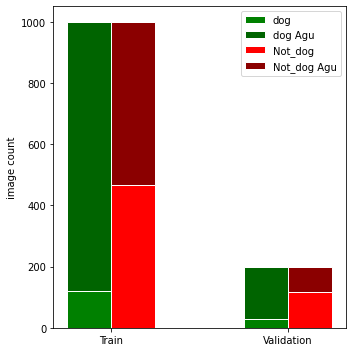

In [31]:
### ALL

barWidth = 0.25

bars1 = [cl1_tr, cl1_va]
bars2 = [cl0_tr, cl0_va]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

agu_bars1 = [cl1_tr_au, cl1_va_au]
agu_bars2 = [cl0_tr_au, cl0_va_au]

ragu1 = [0,1]
ragu2 = [barWidth, 1+barWidth]
bot1 = [cl1_tr, cl1_va]
bot2 = [cl0_tr, cl0_va]

# Make the plot
plt.figure(figsize=(5,5))

plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='w', label= split_on)
plt.bar(ragu1, agu_bars1, bottom=bot1, color='darkgreen', edgecolor='w', width=barWidth, label=f'{split_on} Agu')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='w', label=f'Not_{split_on}')
plt.bar(ragu2, agu_bars2, bottom=bot2, color='darkred', edgecolor='w', width=barWidth, label=f'Not_{split_on} Agu')

plt.ylabel("image count")
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Train', 'Validation'])
plt.legend()
plt.tight_layout()

plt.savefig(f'{name}_train_test_agumented.jpg', dpi=150)

# Create legend & Show graphic
plt.show()

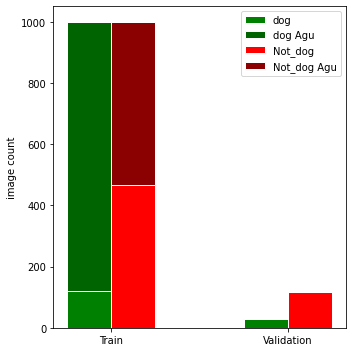

In [32]:
### ONLY TRAIN

barWidth = 0.25

bars1 = [cl1_tr, cl1_va]
bars2 = [cl0_tr, cl0_va]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

agu_bars1 = [cl1_tr_au, 0]
agu_bars2 = [cl0_tr_au, 0]

ragu1 = [0,1]
ragu2 = [barWidth, 1+barWidth]
bot1 = [cl1_tr, cl1_va]
bot2 = [cl0_tr, cl0_va]

# Make the plot
plt.figure(figsize=(5,5))

plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='w', label= split_on)
plt.bar(ragu1, agu_bars1, bottom=bot1, color='darkgreen', edgecolor='w', width=barWidth, label=f'{split_on} Agu')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='w', label=f'Not_{split_on}')
plt.bar(ragu2, agu_bars2, bottom=bot2, color='darkred', edgecolor='w', width=barWidth, label=f'Not_{split_on} Agu')

plt.ylabel("image count")
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Train', 'Validation'])
plt.legend()
plt.tight_layout()

plt.savefig(f'{name}_only_train_agumented.jpg', dpi=150)

# Create legend & Show graphic
plt.show()

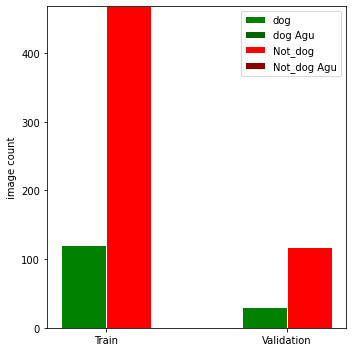

In [33]:
### NO AGU

barWidth = 0.25

bars1 = [cl1_tr, cl1_va]
bars2 = [cl0_tr, cl0_va]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

agu_bars1 = [0, 0]
agu_bars2 = [0, 0]

ragu1 = [0,1]
ragu2 = [barWidth, 1+barWidth]
bot1 = [cl1_tr, cl1_va]
bot2 = [cl0_tr, cl0_va]

# Make the plot
plt.figure(figsize=(5,5))

plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='w', label= split_on)
plt.bar(ragu1, agu_bars1, bottom=bot1, color='darkgreen', edgecolor='w', width=barWidth, label=f'{split_on} Agu')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='w', label=f'Not_{split_on}')
plt.bar(ragu2, agu_bars2, bottom=bot2, color='darkred', edgecolor='w', width=barWidth, label=f'Not_{split_on} Agu')

plt.ylabel("image count")
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Train', 'Validation'])
plt.legend()
plt.tight_layout()

plt.savefig(f'{name}_no_agumentation.jpg', dpi=150)

# Create legend & Show graphic
plt.show()